# Runge-Kutta Method Solving ODE

使用四阶龙格库塔方法求解磁场中带电粒子的螺旋运动。




In [39]:
import numpy as np


def RungeKutta4(func, solutionRange, y0, n):
    """
    input:
    func - the function in the form dy/dt=f(x,y)
    solutionRange - given as a tuple or a list of 2 elements.
    y0 - initial value of y.
    n - the number of slices.
    """
    start, end = solutionRange
    h = float(end - start) / n
    
    # supports vector function, note the column order.
    try:
        y = np.zeros((n+1, len(y0)))
        y0=np.array(y0)
    except TypeError:
        y=np.zeros((n+1,1))
        
    y[0, :] = y0
    x = np.arange(start,end,h)
    for i in range(n):
        k1 = func(x[i], y[i, :])
        k2 = func(x[i] + h / 2, y[i, :] + h / 2 * k1)
        k3 = func(x[i] + h / 2, y[i, :] + h / 2 * k2)
        k4 = func(x[i] + h, y[i, :] + h * k3)
        y[i+1,:]=y[i,:]+h/6*(k1+2*k2+2*k3+k4)
    return y



In [49]:
def f(x,y):
    return y-2.*x/y

def lorentzForce(t,y,q=1,B=[0,0,1],mass=1):
    """
    y has 6 components, namely
    x, y, z  - spacial coordinates
    vx,vy,vz - velocity
    adds a default magnetic field
    """
    y=np.array(y)
    dy_dt=np.zeros_like(y)
    dy_dt[0:3]=y[3:6]
    dy_dt[3:6]=q/mass*np.cross(y[3:6],B)
    return dy_dt

In [72]:
# initial conditions, you can change it if you like.
y0=[0,0,0,0.1,0,1]
sol=RungeKutta4(lorentzForce,[0,100],y0,10000)
print(sol)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e-01
   0.00000000e+00  1.00000000e+00]
 [ 9.99983333e-04 -4.99995833e-06  1.00000000e-02  9.99950000e-02
  -9.99983333e-04  1.00000000e+00]
 [ 1.99986667e-03 -1.99993333e-05  2.00000000e-02  9.99800007e-02
  -1.99986667e-03  1.00000000e+00]
 ...
 [-5.23509606e-02 -1.47980228e-02  9.99800000e+01  8.52019772e-02
   5.23509606e-02  1.00000000e+00]
 [-5.14963375e-02 -1.42787820e-02  9.99900000e+01  8.57212180e-02
   5.14963375e-02  1.00000000e+00]
 [-5.06365648e-02 -1.37681132e-02  1.00000000e+02  8.62318868e-02
   5.06365648e-02  1.00000000e+00]]


以下是绘制出的解的图像，可以拖动鼠标进行查看、调整视角。


<IPython.core.display.Javascript object>


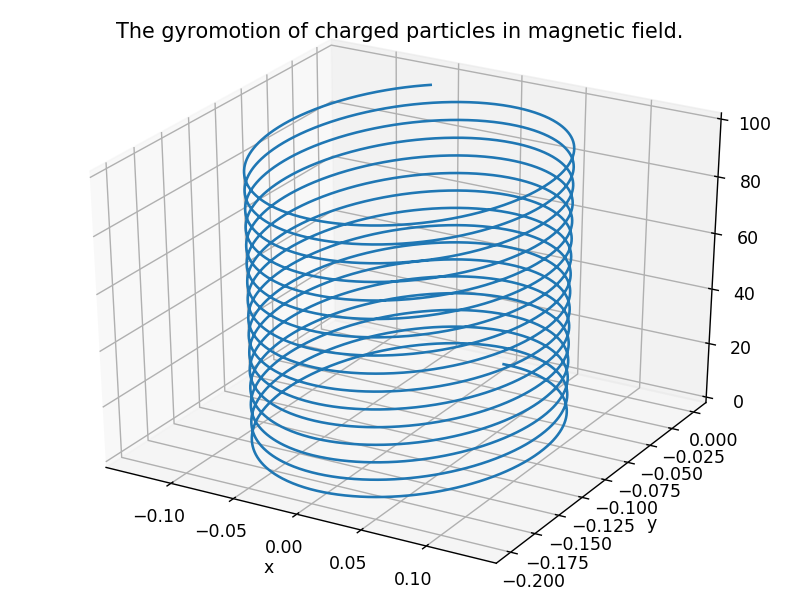

In [75]:
# add this line so that the notebook can provide interaction with matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig=plt.figure("3D plotting")
ax=Axes3D(fig)

ax.plot3D(sol[:,0],sol[:,1],sol[:,2])
ax.axis("equal")

plt.title("The gyromotion of charged particles in magnetic field.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()